# Aggregating Data Sets 

### Consolidating data, the Proper Way :
* <b>KEEP</b> `null`: can impute measure of central tendency later 
* renaming colums for cross-year/report consistentcy
* appending publish/report `year` to each of `4` data sets
* drop all `duplicate` entries
* eliminating columns/ series if information available only for `1` report year
* `city` is approximate location

> #### OUTPUT
> csv with all columns: 
> * WITH `nulls`
> * WITHOUT `duplicate` rows/observations
> <br>
>
> csv, dropping columns that are present in only report: 
> * ES1: `tri`, `tri pctl`, `age`, `age pctl`
> * ES2: `age`, `age pctl`
> * ES4: `lead`, `lead pctl`
>
>  <br>
> 

In [15]:
# I M P O R T S
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# C U S T O M  S E T T I N G S
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

# C U S T O M  S T Y L E 
plt.style.use('gstyle.mplstyle')

> ### IMPORTING ENVIRO SCREEN `1`: 
> * has multiple sheets, extracting RESULTS sheet
> 
> <br>

#### SUPERFLOUS
> * `tri`
> * `tri pctl`
> * `age`
> * `age pctl`

#### MISSING: 
> * county 
> * census tract
> * drinking water
> * drinking water pctl
> * tox. release
> * tox. release pctl
> * pollution burden pctl
> * unemployment pctl
> * pop. char. pctl
> * city 
> * latitude
> * longitude
> * ces_per
> * cardiovascular disease
> * cardiovascular disease pctl
> * housing burden
> * housing burden pctl
> 
> #### might be able to extract `city`, `latitude`, `longitude` from `zip`
> <br>

In [2]:
env1_path = '../raw_data/calenviroscreendatav11.xls'
df = pd.read_excel(env1_path, None)     # read 
#df.keys()
df1 = df['CES1.1 Results']              # define sheet as df 

# basic cleaning: lowercase cols, drop duplicates, dropna
df1.columns = df1.columns.str.lower()
df1.drop_duplicates(keep='last')

# rename cols 
df1_new_col = {
    'zip code':'zip', 
    'ces 1.1 score': 'ces_score',
    'ces 1.1 percentile range' : 'ces_per_range'
}
df1.rename(columns = df1_new_col, inplace=True)

# append year label 
df1['year'] = 2013	    
df1.head()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,tri,tri pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,age,age pctl,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,pop. char.,pop. char. score,ces_score,ces_per_range,year
0,93706,41087,0.177311,76.55,15.61,95.96,6.14,56.19,1120.30,90.59,1962734.0,86.14,388.7,37.64,195,97.58,301,93.43,4.825,84.99,0,0.00,12,84.91,73.4,7.3,28.43,76.46,132.40,98.95,9.10,95.94,47.6,94.22,16.9,79.82,70.6,96.91,90.4,9.0,66.30,96-100% (highest scores),2013
1,93307,82658,0.512336,93.70,19.40,99.69,9.57,64.73,7128.70,98.37,78149.0,59.59,710.3,52.05,104,92.39,202,88.83,10.100,94.64,0,0.00,20,95.69,76.9,7.7,26.93,63.71,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,82.5,8.2,63.44,96-100% (highest scores),2013
2,95205,38069,0.022790,38.53,12.51,71.65,18.95,80.50,94.20,72.24,4773280.0,90.28,1352.2,72.67,96,91.62,325,94.11,9.600,94.22,6,63.87,5,53.97,73.5,7.4,27.72,71.26,73.30,90.71,6.95,60.92,47.9,94.40,23.7,89.37,68.6,96.23,83.8,8.4,61.60,96-100% (highest scores),2013
3,93702,48607,0.317831,86.99,16.08,97.06,36.85,94.91,7.92,53.79,40129.0,53.76,1070.1,65.38,56,82.80,73,65.47,1.275,48.13,0,0.00,2,28.97,66.4,6.6,27.62,70.80,93.50,95.32,8.40,91.26,55.4,97.38,22.4,87.97,73.5,97.72,90.1,9.0,59.83,96-100% (highest scores),2013
4,90058,3223,0.015613,31.32,15.26,94.98,56.80,98.36,0.00,0.00,30458023.0,97.54,923.7,59.97,415,99.83,178,86.73,58.775,100.00,7,71.67,34,99.22,71.9,7.2,25.01,43.20,57.20,80.80,7.34,72.00,69.6,99.70,37.9,97.69,90.5,99.88,82.2,8.2,59.08,96-100% (highest scores),2013


> ### IMPORTING ENVIRO SCREEN `2`: 
> * `location 1` column must be split to extract `city`, `zip`, `latitude`, `longitude`
> * drop `hyperlink` columns

#### SUPERFLOUS
> * `age`
> * `age pctl`

#### MISSING: 
> * ces_per
> * cardiovascular disease
> * cardiovascular disease pctl
> * housing burden
> * housing burden pctl

In [3]:
df2 = pd.read_csv('../raw_data/calenviroscreen2-final-report.csv')

# basic cleaning: lowercase cols, drop duplicates, dropna
df2.columns = df2.columns.str.lower()
df2.drop_duplicates(keep='last')

# dropping superflous columns
df2.drop(columns = ['click for interactive map', 'hyperlink'], inplace=True)

# rename cols 
df2_new_col = {
    'california county': 'county',
    'ces 2.0 score': 'ces_score',
    'ces 2.0 percentile range' : 'ces_per_range', 
}
df2.rename(columns = df2_new_col, inplace=True)

# append year label 
df2['year'] = 2014

In [4]:
# confirm each entry has location entry
df2.shape, df2['location 1'].isnull().sum(), df2['location 1'].shape

((8035, 51), 0, (8035,))

In [5]:
# split location 1 series into various subsets with different delimiters
splitter = df2['location 1'].str.rpartition('\n')
cityzip = splitter[0].str.rpartition()
latlong = splitter[2].str.rpartition(',')

In [6]:
# drop location1
df2.drop(columns='location 1', inplace=True)
# assign new series/cols from location 1 info
df2['city'] = cityzip[0]
df2['zip'] = cityzip[2]
df2['latitude'] = latlong[0].replace(to_replace='\(', value="", regex=True)
df2['longitude'] = latlong[2].replace(to_replace='\)', value="", regex=True)

In [7]:
df2.head()

,census tract,total population,county,ces_score,ces_per_range,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,drinking water,drinking water pctl,pesticides,pesticides pctl,tox. release,tox. release pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,pollution burden pctl,age,age pctl,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,unemployment,unemployment pctl,pop. char.,pop. char. score,pop. char. pctl,year,city,zip,latitude,longitude
0,6019001100,3174,Fresno,89.22,96-100% (highest scores),0.255228,80.87,14.746087,97.83,44.23,93.91,519.882370,83.30,5.470140,53.90,96414.458370,99.81,1217.535680,66.95,85.50,98.86,55.75,85.47,0.52,74.84,0,0.0,5.0,81.49,78.621127,9.530973,99.95,26.4,67.66,130.748821,99.03,0.058025,94.73,55.2,95.60,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,2014,Fresno,93706,36.709695199999999,-119.7816961
1,6019000300,3609,Fresno,83.71,96-100% (highest scores),0.287130,83.28,14.619618,97.57,46.75,94.76,519.882370,83.30,37.749178,69.58,19637.972100,97.79,666.915834,36.06,23.50,86.17,27.50,68.24,0.16,50.42,0,0.0,1.0,37.88,71.967758,8.724451,99.45,29.9,88.03,132.400000,99.19,0.061233,98.40,47.3,91.05,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,2014,Fresno,93706,36.726461999999998,-119.8010347
2,6019000200,3167,Fresno,83.47,96-100% (highest scores),0.304446,84.40,14.554656,97.47,46.91,94.80,519.882370,83.30,11.696444,60.54,11826.724940,95.53,1012.283892,59.69,21.25,84.41,49.75,83.07,0.21,56.85,0,0.0,0.0,0.00,72.408578,8.777912,99.54,27.5,76.31,132.321225,99.11,0.062864,99.29,52.1,93.95,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,2014,Fresno,93706,36.735491400000001,-119.8055044
3,6019001500,2206,Fresno,83.08,96-100% (highest scores),0.225687,78.25,14.937649,98.06,15.66,54.75,753.540501,98.37,2105.763777,93.82,5846.924529,87.54,785.580102,45.43,51.00,96.05,100.50,93.72,12.76,99.48,0,0.0,22.2,99.29,78.999409,9.576797,99.96,27.9,78.76,69.533088,87.18,0.052535,69.29,46.4,90.48,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,2014,Fresno,93725,36.681600000000003,-119.71784270000001
4,6019000600,6161,Fresno,82.95,96-100% (highest scores),0.327935,85.81,14.506413,97.33,57.64,97.57,519.882370,83.30,568.112511,87.65,7158.199033,90.58,838.783805,49.37,4.95,43.88,26.00,66.80,0.27,62.35,0,0.0,0.0,0.00,71.380423,8.653170,99.32,29.0,84.47,116.899716,97.94,0.062997,99.34,45.9,90.09,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,2014,Fresno,93721,36.743062999999999,-119.7933565


> ### IMPORTING ENVIRO SCREEN `3`: 

#### MISSING: 
> * `age`
> * `age pctl`

In [8]:
df3 = pd.read_csv('../raw_data/calenviroscreen-3.0-results-june-2018-update.csv')

# basic cleaning: lowercase cols, drop duplicates, dropna
df3.columns = df3.columns.str.lower()
df3.drop_duplicates(keep='last')

# drop superflous column 
df3.drop(columns= 'sb 535 disadvantaged community', inplace=True)

# rename cols to match other es 
df3_new_col = {
    'california county': 'county',
    'ces 3.0 score': 'ces_score',
    ' ces 3.0 percentile' : 'ces_per',
    'ces 3.0 \npercentile range' : 'ces_per_range', 
    'nearby city \n(to help approximate location only)': 'city'
}
df3.rename(columns = df3_new_col, inplace=True)


# append year label 
df3['year'] = 2018	    
df3.head()

,census tract,total population,county,zip,city,longitude,latitude,ces_score,ces_per,ces_per_range,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,drinking water,drinking water pctl,pesticides,pesticides pctl,tox. release,tox. release pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,pollution burden pctl,asthma,asthma pctl,low birth weight,low birth weight pctl,cardiovascular disease,cardiovascular disease pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,unemployment,unemployment pctl,housing burden,housing burden pctl,pop. char.,pop. char. score,pop. char. pctl,year
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),0.065,98.18,15.40,97.22,48.524,95.54,681.20,80.92,2.75,47.82,18551.957190,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0.00,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70,2018
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),0.062,91.10,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.236622,89.05,782.26,55.66,66.2,97.68,36.00,85.57,1.250,88.77,5,55.01,12.00,92.17,81.19,10.00,100.00,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11,2018
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),0.062,91.10,15.40,97.22,47.445,95.42,681.20,80.92,3.03,48.75,12454.948410,95.42,576.52,39.00,22.0,85.13,30.25,81.93,0.200,60.50,0,0.00,2.50,57.18,71.16,8.76,99.00,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99,2018
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.782922,69.97,1305.01,78.29,50.1,96.10,132.10,98.41,0.795,84.32,19,98.63,27.00,99.10,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72,2018
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),0.065,98.18,15.40,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.706720,98.15,435.16,24.30,60.0,97.15,54.20,92.09,13.100,99.70,0,0.00,50.80,99.91,80.20,9.88,99.99,90.48,89.54,4.50,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76,2018


> ### IMPORTING ENVIRO SCREEN `4`: 

#### SUPERFLOUS
> * `lead`
> * `lead pctl`

In [9]:
env4_path = '../raw_data/calenviroscreen40resultsdatadictionary_F_2021.xlsx'
df = pd.read_excel(env4_path, None)          # read 
df.keys()
df4 = df['CES4.0FINAL_results']              # define sheet as df 

In [10]:
# basic cleaning: lowercase cols, drop duplicates, dropna
df4.columns = df4.columns.str.lower()
df4.drop_duplicates(keep='last')

# rename cols to match other
df4_new_col = {
    'california county': 'county', 
    'approximate location' : 'city', 
    'ces 4.0 score': 'ces_score',
    ' ces 4.0 percentile' : 'ces_per',
    'ces 4.0 percentile range' : 'ces_per_range'
}
df4.rename(columns = df4_new_col, inplace=True)

df4['year'] = 2021
df4.head()

,census tract,total population,county,zip,city,longitude,latitude,ces_score,ces_per,ces_per_range,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,drinking water,drinking water pctl,lead,lead pctl,pesticides,pesticides pctl,tox. release,tox. release pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,pollution burden pctl,asthma,asthma pctl,low birth weight,low birth weight pctl,cardiovascular disease,cardiovascular disease pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,unemployment,unemployment pctl,housing burden,housing burden pctl,pop. char.,pop. char. score,pop. char. pctl,year
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),0.060311,82.476665,13.906348,97.710019,1.122712,98.718108,733.946935,84.388660,89.600854,96.471330,1.001925,42.896552,4859.094604,92.198050,1037.095744,60.3750,70.50,98.189623,54.25,91.167192,3.10,96.307081,0,0.000000,6.00,79.954181,78.977404,9.643125,99.925327,129.54,97.220837,7.80,95.624840,21.47,92.248255,44.5,93.229562,16.0,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642,2021
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),0.045884,44.978220,11.884085,72.594897,0.538105,91.151213,389.846569,41.551143,77.302272,86.830498,63.132574,73.655172,519.628001,52.350588,856.395935,48.2875,61.90,97.461739,78.60,95.085506,1.27,88.577101,13,91.873163,9.25,89.278351,73.434993,8.966398,99.290604,105.88,94.217348,6.88,88.722094,20.26,88.123131,46.4,94.469754,29.7,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250,2021
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),0.047920,53.727442,12.251640,89.209708,0.780833,96.552582,787.940335,92.531535,92.563660,98.399496,0.000000,0.000000,3682.693278,87.734434,2522.622269,92.8375,38.75,92.963792,20.50,68.919143,11.62,99.655857,7,66.736665,4.85,73.081329,77.673177,9.483880,99.863099,76.10,82.764207,7.11,90.890429,20.87,90.154536,52.2,97.393065,17.1,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208,2021
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),0.060311,82.476665,13.520939,95.880523,0.173815,57.087741,733.946935,84.388660,68.385084,77.000630,44.574874,71.586207,1630.342707,74.931233,690.502159,35.2750,16.50,77.323628,9.50,44.828159,2.36,94.123097,0,0.000000,5.75,78.144330,67.846836,8.284085,97.398880,139.45,98.242772,10.65,99.781884,22.68,94.566301,41.4,90.939003,15.7,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536,2021
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),0.060311,82.476665,13.818959,97.473553,1.389658,99.303049,733.946935,84.388660,75.414535,85.116572,16.625496,64.413793,1975.207988,78.957239,909.650882,52.2625,10.50,62.448675,28.25,78.050805,0.35,56.399735,0,0.000000,0.00,0.000000,66.825950,8.159435,96.938395,139.08,98.167996,10.25,99.666410,22.64,94.429212,43.6,92.571501,20.0,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571,2021


## PROCESSING

In [11]:
# printing unique counts per label, compare columns
df_uniques = [df1.nunique(), df2.nunique(), df3.nunique(), df4.nunique()]
pd.DataFrame(df_uniques).to_csv('unique_counts.csv', index_label='ces_edition')

In [12]:
# Per David's notes: ES2 low birth weight is fraction
# comment out to print raw value
df2['low birth weight'] = df2['low birth weight']* 100

In [13]:
ozone = pd.DataFrame([df1['ozone'], df2['ozone'], df3['ozone'], df4['ozone']])
ozone = pd.DataFrame.transpose(ozone)
ozone.describe()

,ozone,ozone,ozone,ozone
count,1631.000000,7970.000000,8035.000000,8035.000000
mean,0.097834,0.104349,0.047430,0.048666
std,0.178263,0.180335,0.010244,0.010475
min,0.000000,0.000000,0.026000,0.026554
25%,0.000000,0.000702,0.040000,0.041926
50%,0.016930,0.016299,0.046000,0.047165
75%,0.107400,0.128813,0.055000,0.056800
max,1.285954,1.277333,0.068000,0.073132


> OZONE:
> 
> * 1 2007 - 2009 Annual Mean Concentration PM 2.5 (average of quarterly mean)
>   * estimated values for each `ZIP `code
> * 2 2009 - 2011 Amount of daily maximum 8hr over 8hr-standard (0.070ppm)
>   * estimated values for entire `census tract`
>   * ordinary kriging geostatistical method used - only for tracts within 50km of a monitor
> * 3 2012 - 2014 Mean of summer months (May - Oct) of daily maximum, 8hr ozone concentration, ppm
>   * estimated for "center of each `census tract`"
>   * using inverse distance weighting - only for tracts within 50km of a monitor
> * 4 2017 - 2019 Mean of summer months (May - Oct) of daily maximm, 8hr ozone concentration, ppm
>   * estimated for "center of each `census tract`" - only for tracts within 50km of a monitor
>   * ordinary `kirging` spatial interpolatin method used to estimate
>
> <br>

In [24]:
# TEST ADDING THE FED?CA LIMIT OF 0.075 ppm: COMMENT OUT if it doens't make sense. 
df1['ozone'] = df1['ozone'] + 0.075
df2['ozone'] = df2['ozone'] + 0.075

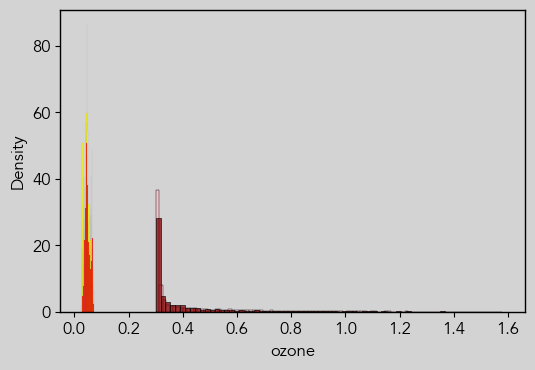

In [20]:
sns.histplot(data = df2, 
        x = df2['ozone'], 
        color = 'pink',
        stat = 'density'
        );
sns.histplot(data = df1, 
        x = df1['ozone'], 
        color = 'maroon',
        stat = 'density'
        );
sns.histplot(data = df3, 
        x = df3['ozone'], 
        color = 'yellow',
        stat = 'density'
        );
sns.histplot(data = df4, 
        x = df4['ozone'], 
        color = 'red',
        stat = 'density'
        );

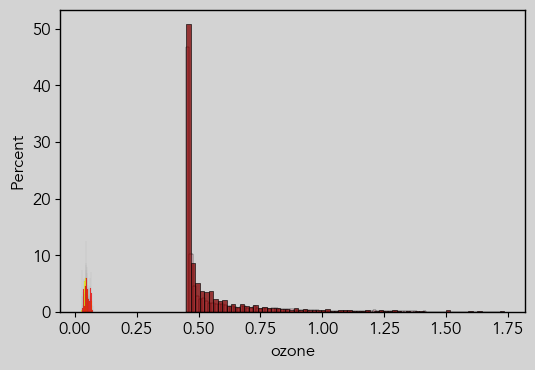

In [22]:
# TEST ADDING THE FED?CA LIMIT OF 0.075
df1['ozone'] = df1['ozone'] + 0.075
df2['ozone'] = df2['ozone'] + 0.075


sns.histplot(data = df2, 
        x = df2['ozone'], 
        color = 'pink',
        stat = 'percent'
        );
sns.histplot(data = df1, 
        x = df1['ozone'], 
        color = 'maroon',
        stat = 'percent'
        );
sns.histplot(data = df3, 
        x = df3['ozone'], 
        color = 'yellow',
        stat = 'percent'
        );
sns.histplot(data = df4, 
        x = df4['ozone'], 
        color = 'red',
        stat = 'percent'
        );

> ### Printing processed DF as individual files: 
> * not 'clean',
> * WITH `nulls`
> * WITHOUT `duplicate` rows/observations
> 
> <br>

In [ ]:
df1.to_csv('../processed_data/df1_processed.csv', index = False)
df2.to_csv('../processed_data/df2_processed.csv', index = False)
df3.to_csv('../processed_data/df3_processed.csv', index = False)
df4.to_csv('../processed_data/df4_processed.csv', index = False)

> ### Printing 1 aggreagate file: 
> * eliminating columns/ series if information available only for `1` report year
> * year appended to each set
> 
> <br>

In [ ]:
# dropping cols from DFs
df1.drop(columns = ['tri', 'tri pctl', 'age', 'age pctl'], inplace = True)
df2.drop(columns = ['age', 'age pctl'], inplace = True)
df4.drop(columns = ['lead', 'lead pctl'], inplace = True)

In [ ]:
# appending, printing
df_all = pd.concat([df1, df2, df3, df4])
df_all.head()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,pop. char.,pop. char. score,ces_score,ces_per_range,year,census tract,county,drinking water,drinking water pctl,tox. release,tox. release pctl,pollution burden pctl,unemployment,unemployment pctl,pop. char. pctl,city,latitude,longitude,ces_per,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl
0,93706,41087,0.177311,76.55,15.61,95.96,6.14,56.19,1120.30,90.59,388.7,37.64,195.0,97.58,301.0,93.43,4.825,84.99,0,0.00,12.0,84.91,73.4,7.3,132.40,98.95,9.10,95.94,47.6,94.22,16.9,79.82,70.6,96.91,90.4,9.0,66.30,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93307,82658,0.512336,93.70,19.40,99.69,9.57,64.73,7128.70,98.37,710.3,52.05,104.0,92.39,202.0,88.83,10.100,94.64,0,0.00,20.0,95.69,76.9,7.7,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,82.5,8.2,63.44,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95205,38069,0.022790,38.53,12.51,71.65,18.95,80.50,94.20,72.24,1352.2,72.67,96.0,91.62,325.0,94.11,9.600,94.22,6,63.87,5.0,53.97,73.5,7.4,73.30,90.71,6.95,60.92,47.9,94.40,23.7,89.37,68.6,96.23,83.8,8.4,61.60,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93702,48607,0.317831,86.99,16.08,97.06,36.85,94.91,7.92,53.79,1070.1,65.38,56.0,82.80,73.0,65.47,1.275,48.13,0,0.00,2.0,28.97,66.4,6.6,93.50,95.32,8.40,91.26,55.4,97.38,22.4,87.97,73.5,97.72,90.1,9.0,59.83,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90058,3223,0.015613,31.32,15.26,94.98,56.80,98.36,0.00,0.00,923.7,59.97,415.0,99.83,178.0,86.73,58.775,100.00,7,71.67,34.0,99.22,71.9,7.2,57.20,80.80,7.34,72.00,69.6,99.70,37.9,97.69,90.5,99.88,82.2,8.2,59.08,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df_all.to_csv('../processed_data/all_processed.csv', index = False)


>
> csv, dropping columns that are present in only report: 
> * ES1: `tri`, `tri pctl`, `age`, `age pctl`
> * ES2: `age`, `age pctl`
> * ES3: `lead`, `lead pctl`
>
>  <br>

### CARDIOVASCULAR: 
### * not available for 1, 2
### * don't know why it changed so much 
## *  CANNOT USE AS HELATH OUTCOME METRIC